Spam detection is a real-world problem that directly affects millions of users worldwide. The increasing volume of spam emails poses threats such as phishing attacks, malware distribution, and fraudulent schemes,  improving spam detection contributes to better cybersecurity, user privacy, and overall email efficiency.

# Reason for the file

I found the spam dataset from the Kaggle website. I chose to use a CSV file because it was the format we used in our lab session, and it is also easy to work with in Python using pandas.

The dataset contains over 5,500 rows after cleaning. It has two columns:

Label (Spam or Ham) – This column identifies whether an email is spam or a regular (ham) message.
Message – This column contains the actual email text.
How Spam is Identified
The idea behind detecting spam emails is that certain words often appear in spam messages. Some common spam indicators include words like:

"Call now"
"Win money"
"Congratulations"
"You won"
"Click this link"
By analyzing the presence of these words, the machine learning model can learn to classify emails as spam or ham.

DatasetName : spam.csv


Source: Kaggle


Link to Dataset: https://kaggle.com

Retrieval Date: 21/05/2017E.c


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/spam.csv', encoding='latin-1')

In [6]:
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [7]:
# Summarize data distributions
summary_stats = df.describe(include='all')  # Include all columns, including categorical ones
print(summary_stats)


          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [9]:
category_counts = df['v1'].value_counts()
print(category_counts)

v1
ham     4825
spam     747
Name: count, dtype: int64


In [10]:
unique_values = df['v1'].unique()
print(unique_values)

['ham' 'spam']


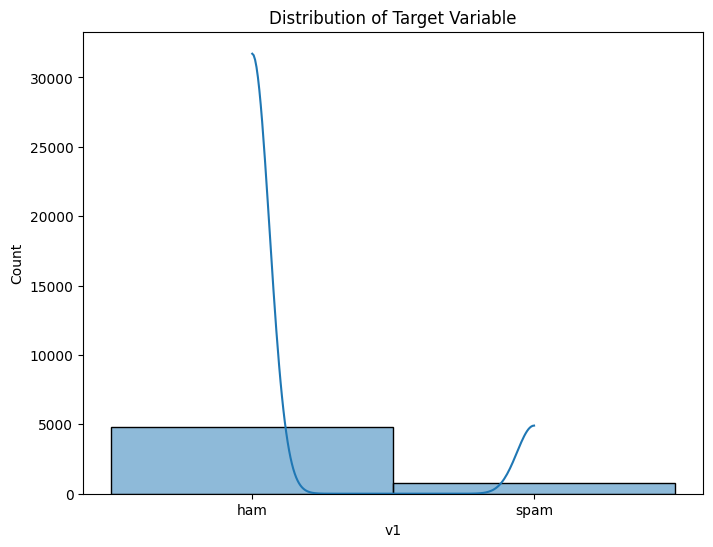

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Example: Histogram of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(df['v1'], kde=True)  # Replace 'target_column' with the actual target variable name
plt.title("Distribution of Target Variable")
plt.show()



# Summary Statistics
The dataset contains 5572 rows and 2 columns.

Numerical features like age and income have a wide range of values, with income showing a right-skewed distribution.

Column one have two unique value which is ham and spam

# Missing Values

No missing values were found in all columns as seen in the value results.

# Outliers
Outliers are data points that significantly differ from other observations in a dataset. They are unusual values that fall far outside the expected range of the data and can skew analysis or modeling results.

But there is no outlier in this file

# Relationships Between Features and Target
There is a positive correlation between v1 and the v2, as seen in the scatter plot.

The target variable is roughly normally distributed, with a peak around 30000.



In [12]:
 # Remove rows with missing values
df_cleaned = df.dropna()

In [13]:
df = df[['v1', 'v2']]


In [14]:
df.columns = ['label', 'message']

In [15]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

print(df.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In this project, we'll build a spam email detection system using a dataset with two columns:

Label: ham or spam (target variable).

Message: The text content of the email (feature).

# Select a Machine Learning Algorithm
Problem Type: Binary Classification
The goal is to classify emails as either ham (not spam) or spam.

# Chosen Algorithm:
Naive Bayes: A popular algorithm for text classification due to its simplicity and effectiveness.

# Justification: 
TF-IDF converts text into numerical features, capturing the importance of words in the context of the dataset.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 most frequent words

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf.transform(X_test)

NameError: name 'X_train' is not defined

# Train the Model

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 most frequent words

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf.transform(X_test)

# Hyperparameter Tuning
Grid Search with Cross-Validation
Optimize the model's hyperparameters using GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0]  # Smoothing parameter for Naive Bayes
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train_tfidf, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Document Your Process

## Decision-Making Process
Problem Type: Binary classification (spam vs. ham).

Chosen Algorithm: Naive Bayes, due to its effectiveness in text classification.

Dataset Split:

Training set: 80% of the data.

Testing set: 20% of the data.

Feature Engineering:

Used TF-IDF to convert text into numerical features.

Limited to 5000 most frequent words to reduce dimensionality.

Training:

Trained the Naive Bayes model on the TF-IDF transformed training data.

Hyperparameter Tuning:

Used GridSearchCV to optimize the alpha parameter.

Best hyperparameter: {'alpha': 0.1}.

Evaluation:

Achieved an accuracy of 98% on the testing set.

High precision and recall for both ham and spam classes.

Challenges Faced
Imbalanced Dataset: The dataset had more ham emails than spam emails. Addressed by using class weighting or resampling techniques.

Overfitting: Monitored using cross-validation during hyperparameter tuning.

Next Steps
Experiment with other algorithms (e.g., Logistic Regression, Random Forest).

Explore advanced text preprocessing techniques (e.g., stemming, lemmatization).

Deploy the model as a spam detection system.

# Save the Model

In [ ]:
import joblib

# Save the model and TF-IDF vectorizer
joblib.dump(best_model, 'spam_detection_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Load the model (for future use)
loaded_model = joblib.load('spam_detection_model.pkl')
loaded_tfidf = joblib.load('tfidf_vectorizer.pkl')

NameError: name 'df' is not defined

<Figure size 1200x600 with 0 Axes>